## About the Dataset

Imagine you are a data scientist working for a real estate company that is planning to invest in Boston real estate. You have collected information about various areas of Boston and are tasked with created a model that can predict the median price of houses for that area so it can be used to make offers.

The dataset had information on areas/towns not individual houses, the features are

CRIM: Crime per capita

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to ﬁve Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per $10,000

PTRAIO: Pupil-teacher ratio by town

LSTAT: Percent lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


In [72]:
#Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
#Import ML package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [74]:
#Import Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [75]:
#load dataset
df = pd.read_csv("real_estate_data.csv")

In [76]:
df.shape

(506, 13)

In [77]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [79]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [80]:
df.dropna(inplace = True)

In [81]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [82]:
#Target Variable
x = df.drop(columns = ["MEDV"], axis = 1)
y = df.iloc[:, 12]

In [83]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [84]:
#split train and test data 
x_train, x_test, y_train, y_test = train_test_split(x, y , random_state = 165, test_size = 0.3)

In [143]:
#model 
rt = DecisionTreeRegressor(criterion = "friedman_mse", max_depth = 2, random_state = 100)
rt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, random_state=100)

In [144]:
#prdict train value
y_pred = rt.predict(x_train)

In [145]:
#Evaluation metrics for train dataset
print(r2_score(y_train, y_pred))


0.7519714347774293


[Text(0.5, 0.8333333333333334, 'x[5] <= 6.838\nfriedman_mse = 86.273\nsamples = 275\nvalue = 22.658'),
 Text(0.25, 0.5, 'x[11] <= 16.365\nfriedman_mse = 40.427\nsamples = 228\nvalue = 19.696'),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 24.29\nsamples = 152\nvalue = 22.672'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 19.567\nsamples = 76\nvalue = 13.745'),
 Text(0.75, 0.5, 'x[5] <= 7.437\nfriedman_mse = 59.7\nsamples = 47\nvalue = 37.026'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 13.899\nsamples = 29\nvalue = 31.759'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 16.792\nsamples = 18\nvalue = 45.511')]

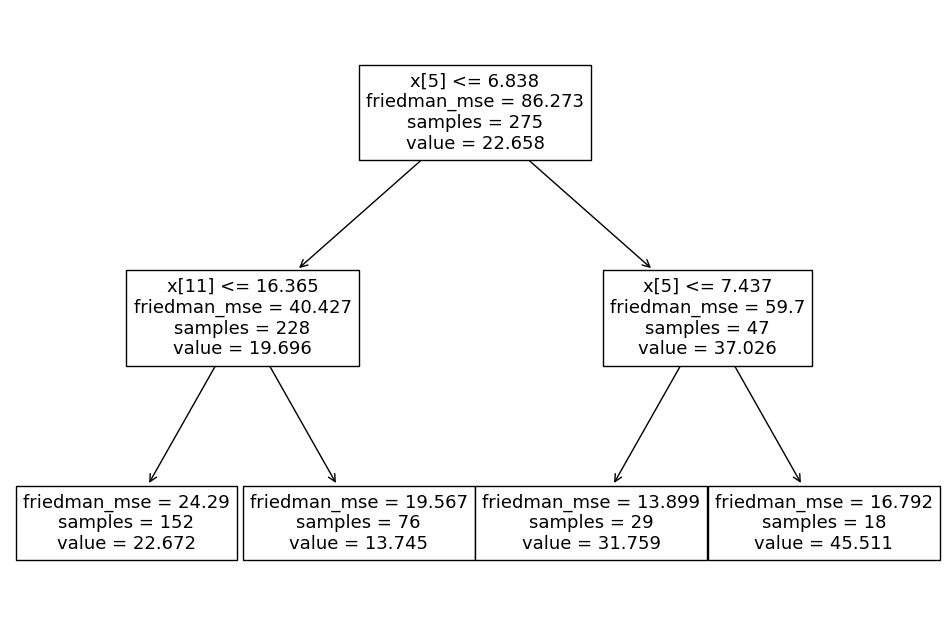

In [146]:
#Graphical presentation
plt.figure(figsize = (12,8))
tree.plot_tree(rt.fit(x_train, y_train))

In [147]:
#Visualization Regression Tree with graphviz
import graphviz

In [148]:
dot_data = tree.export_graphviz(rt,feature_names = x_train.columns, class_names = y_train,\
                               filled = True, rounded = True)
graph = graphviz.Source(dot_data)

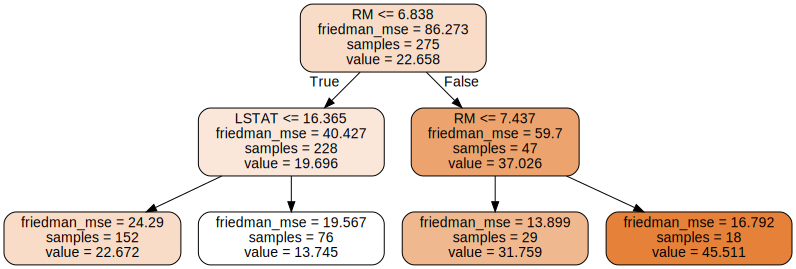

In [149]:
graph

In [150]:
#Predict Test data
y_pred_test = rt.predict(x_test)

In [151]:
# Check for over and under fitting
print("Training set score {:.4f}".format(rt.score(x_train, y_train)))
print("Testing set score {:.4f}".format(rt.score(x_test, y_test)))

Training set score 0.7520
Testing set score 0.6333
